In [25]:
library(Seurat)
library(SeuratDisk)
library(NMF)
library(ggalluvial)
library(ComplexHeatmap)
library(CellChat)
library(patchwork)
library(graphics)
library(Matrix)
library(circlize)
library(colorspace)
library(pracma)
library(glue)

options(stringsAsFactors = FALSE, repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 300)

source("A-sender_receiver-chord.r")

# Parameters

In [2]:
# for plotting figC, differential network
disease = "PTSD"
project = "PTSD_Call"

type <- "truncatedMean"
trim <- 0.05

In [4]:
cellchat.CT <- readRDS(file = glue("/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/PTSD_Call/Obj-CellChat/RNA_FINAL-CON-type_{type}-trim_{trim}_cellchat.rds"))
cellchat.PTSD <- readRDS(file = glue("/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/PTSD_Call/Obj-CellChat/RNA_FINAL-PTSD-type_{type}-trim_{trim}_cellchat.rds"))
cellchat.MDD <- readRDS(file = glue("/gpfs/gibbs/pi/girgenti/JZhang/CL/C2C/PTSD_Call/Obj-CellChat/RNA_FINAL-MDD-type_{type}-trim_{trim}_cellchat.rds"))

In [7]:
object.list_PTSDvCON <- list(CT = cellchat.CT, PTSD = cellchat.PTSD)
cellchat_PTSDvCON <- mergeCellChat(object.list_PTSDvCON, add.names = names(object.list_PTSDvCON))
print(cellchat_PTSDvCON)
print(names(object.list_PTSDvCON))

object.list_MDDvCON <- list(CT = cellchat.CT, MDD = cellchat.MDD)
cellchat_MDDvCON <- mergeCellChat(object.list_MDDvCON, add.names = names(object.list_MDDvCON))
print(cellchat_MDDvCON)
print(names(object.list_MDDvCON))

An object of class CellChat created from a merged object with multiple datasets 
 616 signaling genes.
 617967 cells. 
CellChat analysis of single cell RNA-seq data! 
[1] "CT"   "PTSD"


Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



An object of class CellChat created from a merged object with multiple datasets 
 616 signaling genes.
 625220 cells. 
CellChat analysis of single cell RNA-seq data! 
[1] "CT"  "MDD"


In [10]:
celltype_name = c('Astro', 'Endo', 'MG', 'Oligo', 'OPC', 
                  'Exc CUX2', 'Exc FEZF2', 'Exc OPRK1', 'Exc RORB', 
                  'Inh KCNG1', 'Inh LAMP5', 'Inh PVALB', 'Inh SST', 'Inh VIP')
measure = 'weight'

In [11]:
color.use = c(rainbow_hcl(5, c = 100), colorRampPalette(c("red", "orange"))(4), colorRampPalette(c("blue", "green"))(5))
color.use

[1] "#FF7A9E" "#CAAA00" "#00CA66" "#00C6F2" "#DA88FF" "#FF0000" "#FF3700"
 [8] "#FF6E00" "#FFA500" "#0000FF" "#003FBF" "#007F7F" "#00BF3F" "#00FF00"

# Code 

In [49]:
direction <- "to"
receiver = c('Inh SST')
sender = c('')

## Cell Type

In [50]:
pathways.show      <- "all"

In [51]:
# get the matrix
obj1 <- object.list_PTSDvCON[[1]]@net[[measure]]              # CT
obj2 <- object.list_PTSDvCON[[2]]@net[[measure]]              # DIS
melt_1 <- reshape2::melt(obj1, value.name="count")
melt_2 <- reshape2::melt(obj2, value.name="count")
sum1 <- sum(melt_1$count)
sum2 <- sum(melt_2$count)

# balance
normalization_PTSDvCON = sum1 / sum2
# normalization = sum(object.list[[1]]@netP$prob) / sum(object.list[[2]]@netP$prob)
net.diff_PTSDvCON <- obj2 * (normalization_PTSDvCON) - obj1

# reorder the celltypes
net.diff_PTSDvCON <- net.diff_PTSDvCON[celltype_name, celltype_name]

net.diff_PTSDvCON[setdiff(celltype_name, sender), setdiff(celltype_name, receiver)] <- 0 

png 
  2

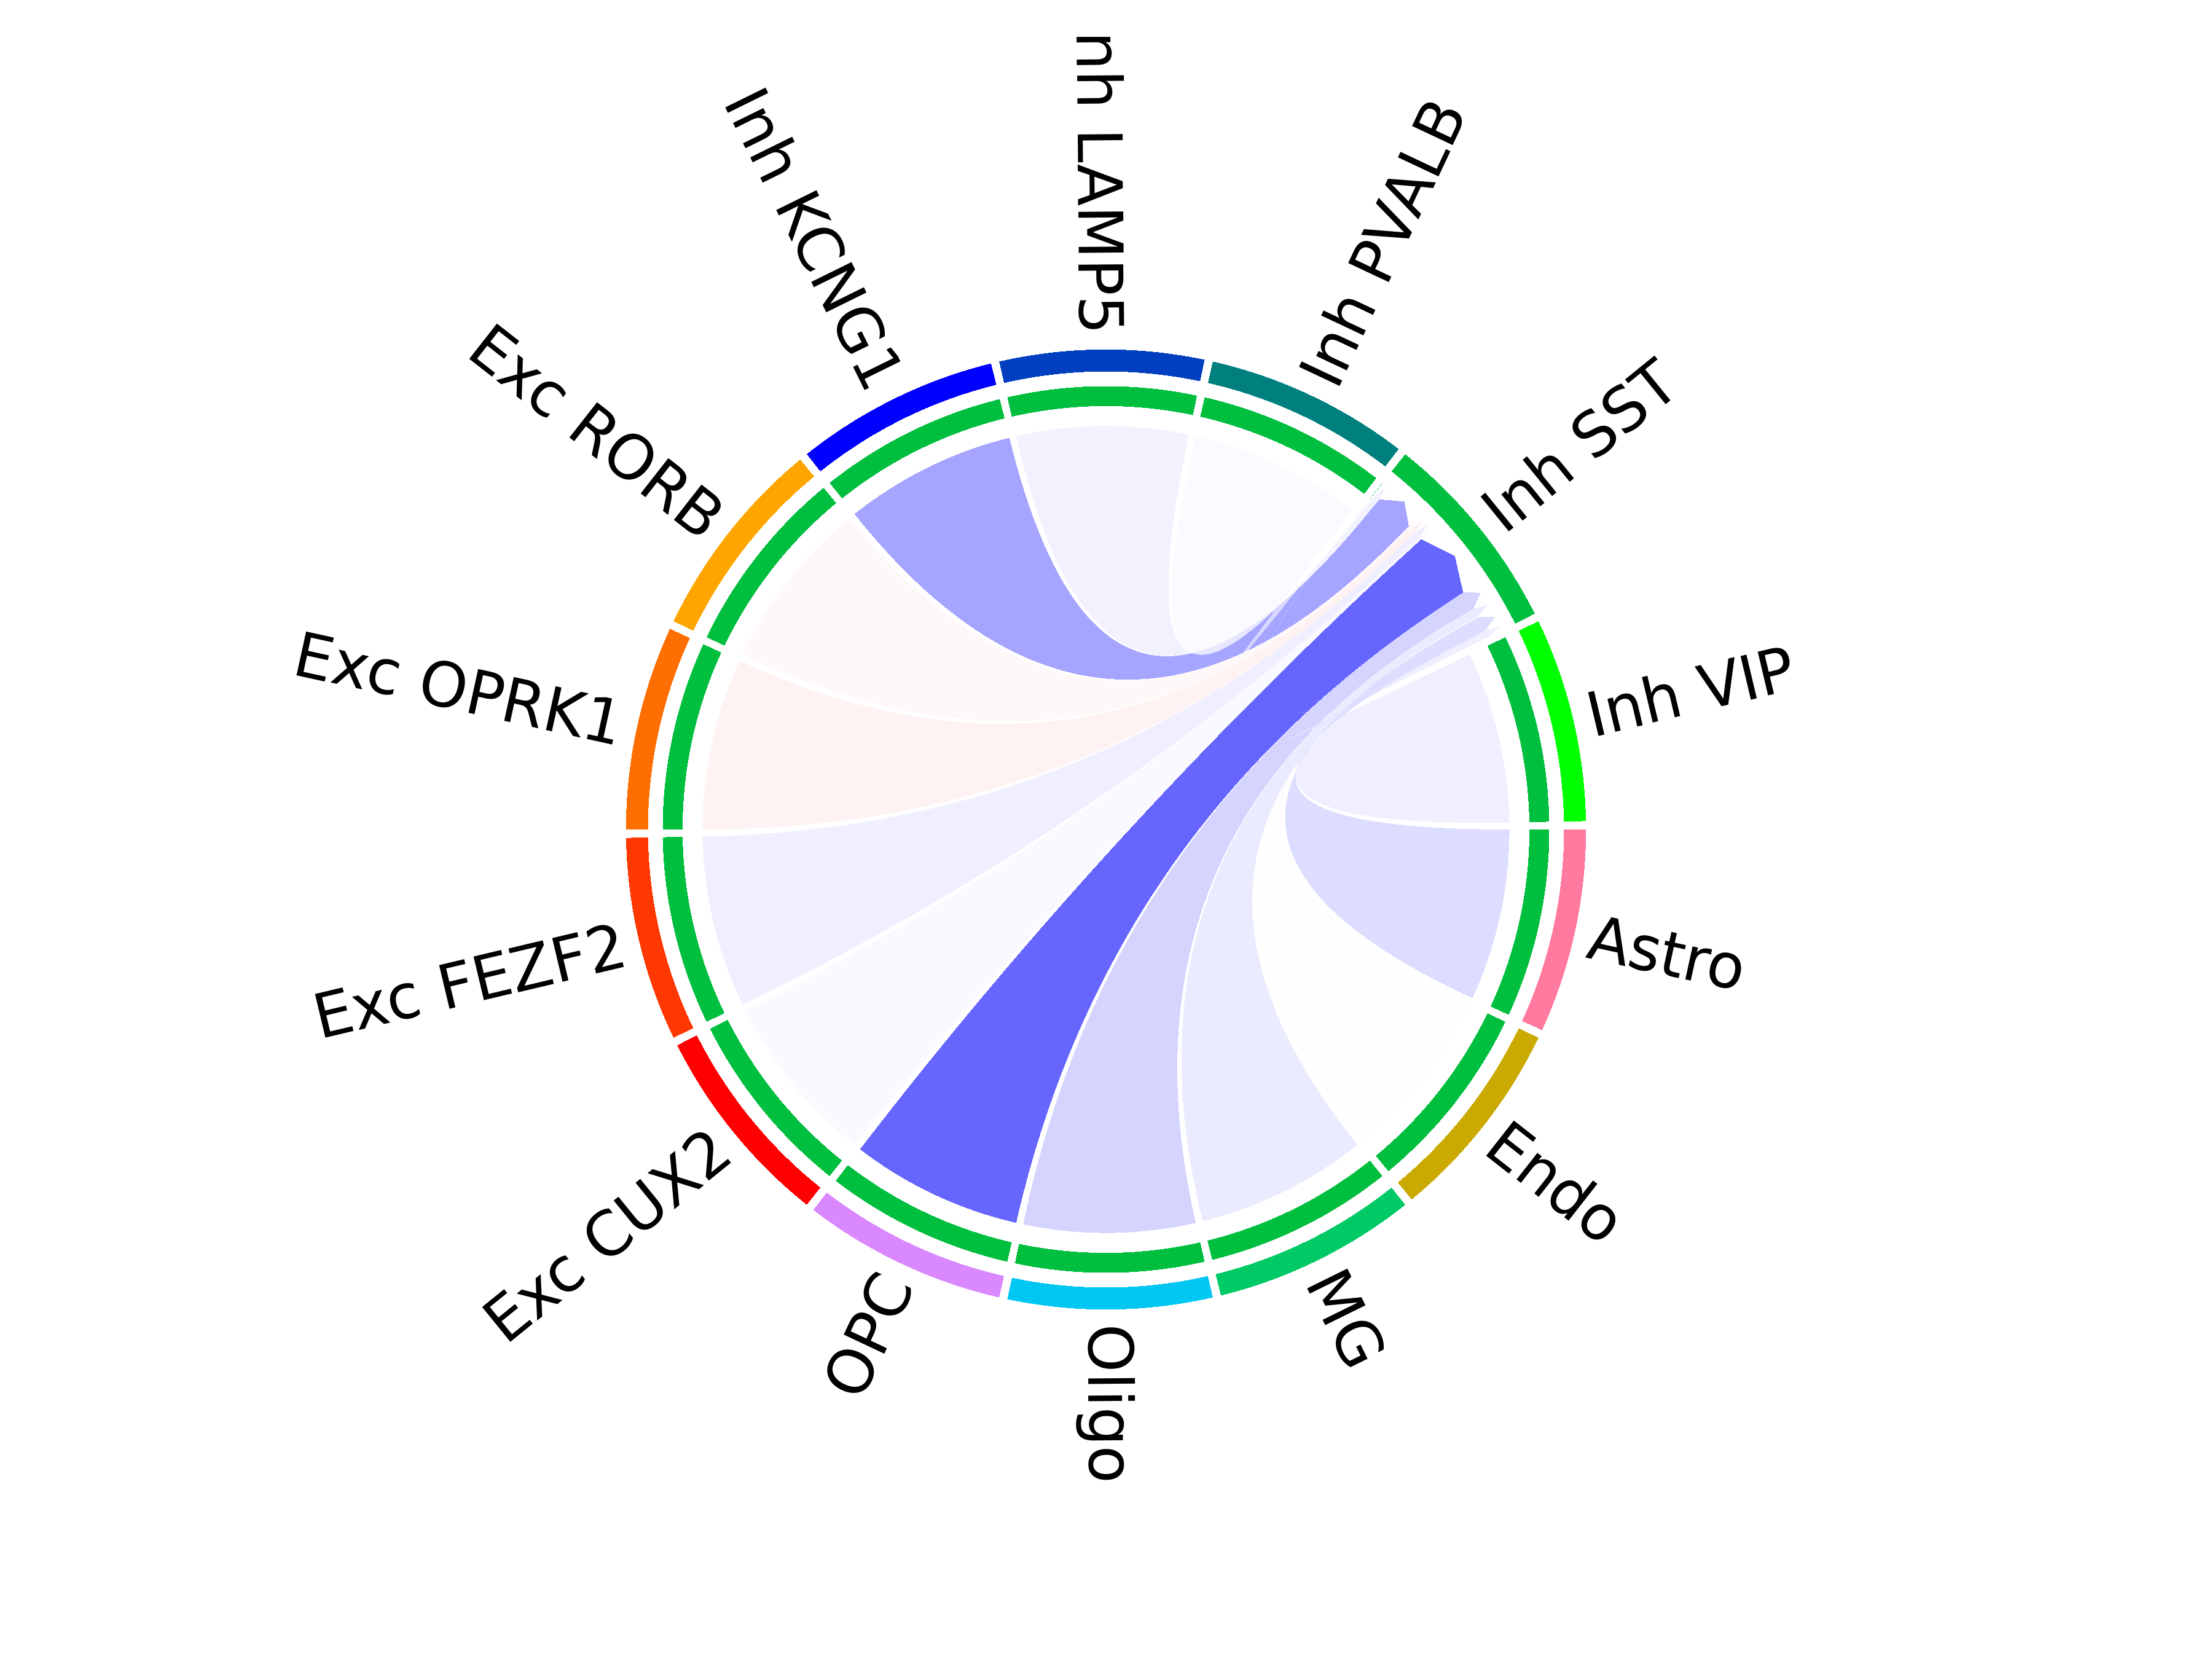

In [52]:
gg2 <- my_netVisual_aggregate2(net.diff_PTSDvCON, layout="chord", cell.order=celltype_name, signaling.name = pathways.show, 
                               color.use = color.use, vertex.label.cex = 2)

pdf(file = glue("/gpfs/gibbs/project/girgenti/cl2553/C2C/PTSD_Call/cellchat_figs/chord-{direction}_{sender}{receiver}-{pathways.show}-PTSD.pdf"), 
    width = 12, height = 12)
print(gg2) 
dev.off()

In [53]:
# get the matrix
obj1 <- object.list_MDDvCON[[1]]@net[[measure]]              # CT
obj2 <- object.list_MDDvCON[[2]]@net[[measure]]              # DIS
melt_1 <- reshape2::melt(obj1, value.name="count")
melt_2 <- reshape2::melt(obj2, value.name="count")
sum1 <- sum(melt_1$count)
sum2 <- sum(melt_2$count)

# balance
normalization_MDDvCON = sum1 / sum2
# normalization = sum(object.list[[1]]@netP$prob) / sum(object.list[[2]]@netP$prob)
net.diff_MDDvCON <- obj2 * (normalization_MDDvCON) - obj1

# reorder the celltypes
net.diff_MDDvCON <- net.diff_MDDvCON[celltype_name, celltype_name]

net.diff_MDDvCON[setdiff(celltype_name, sender), setdiff(celltype_name, receiver)] <- 0 

png 
  2

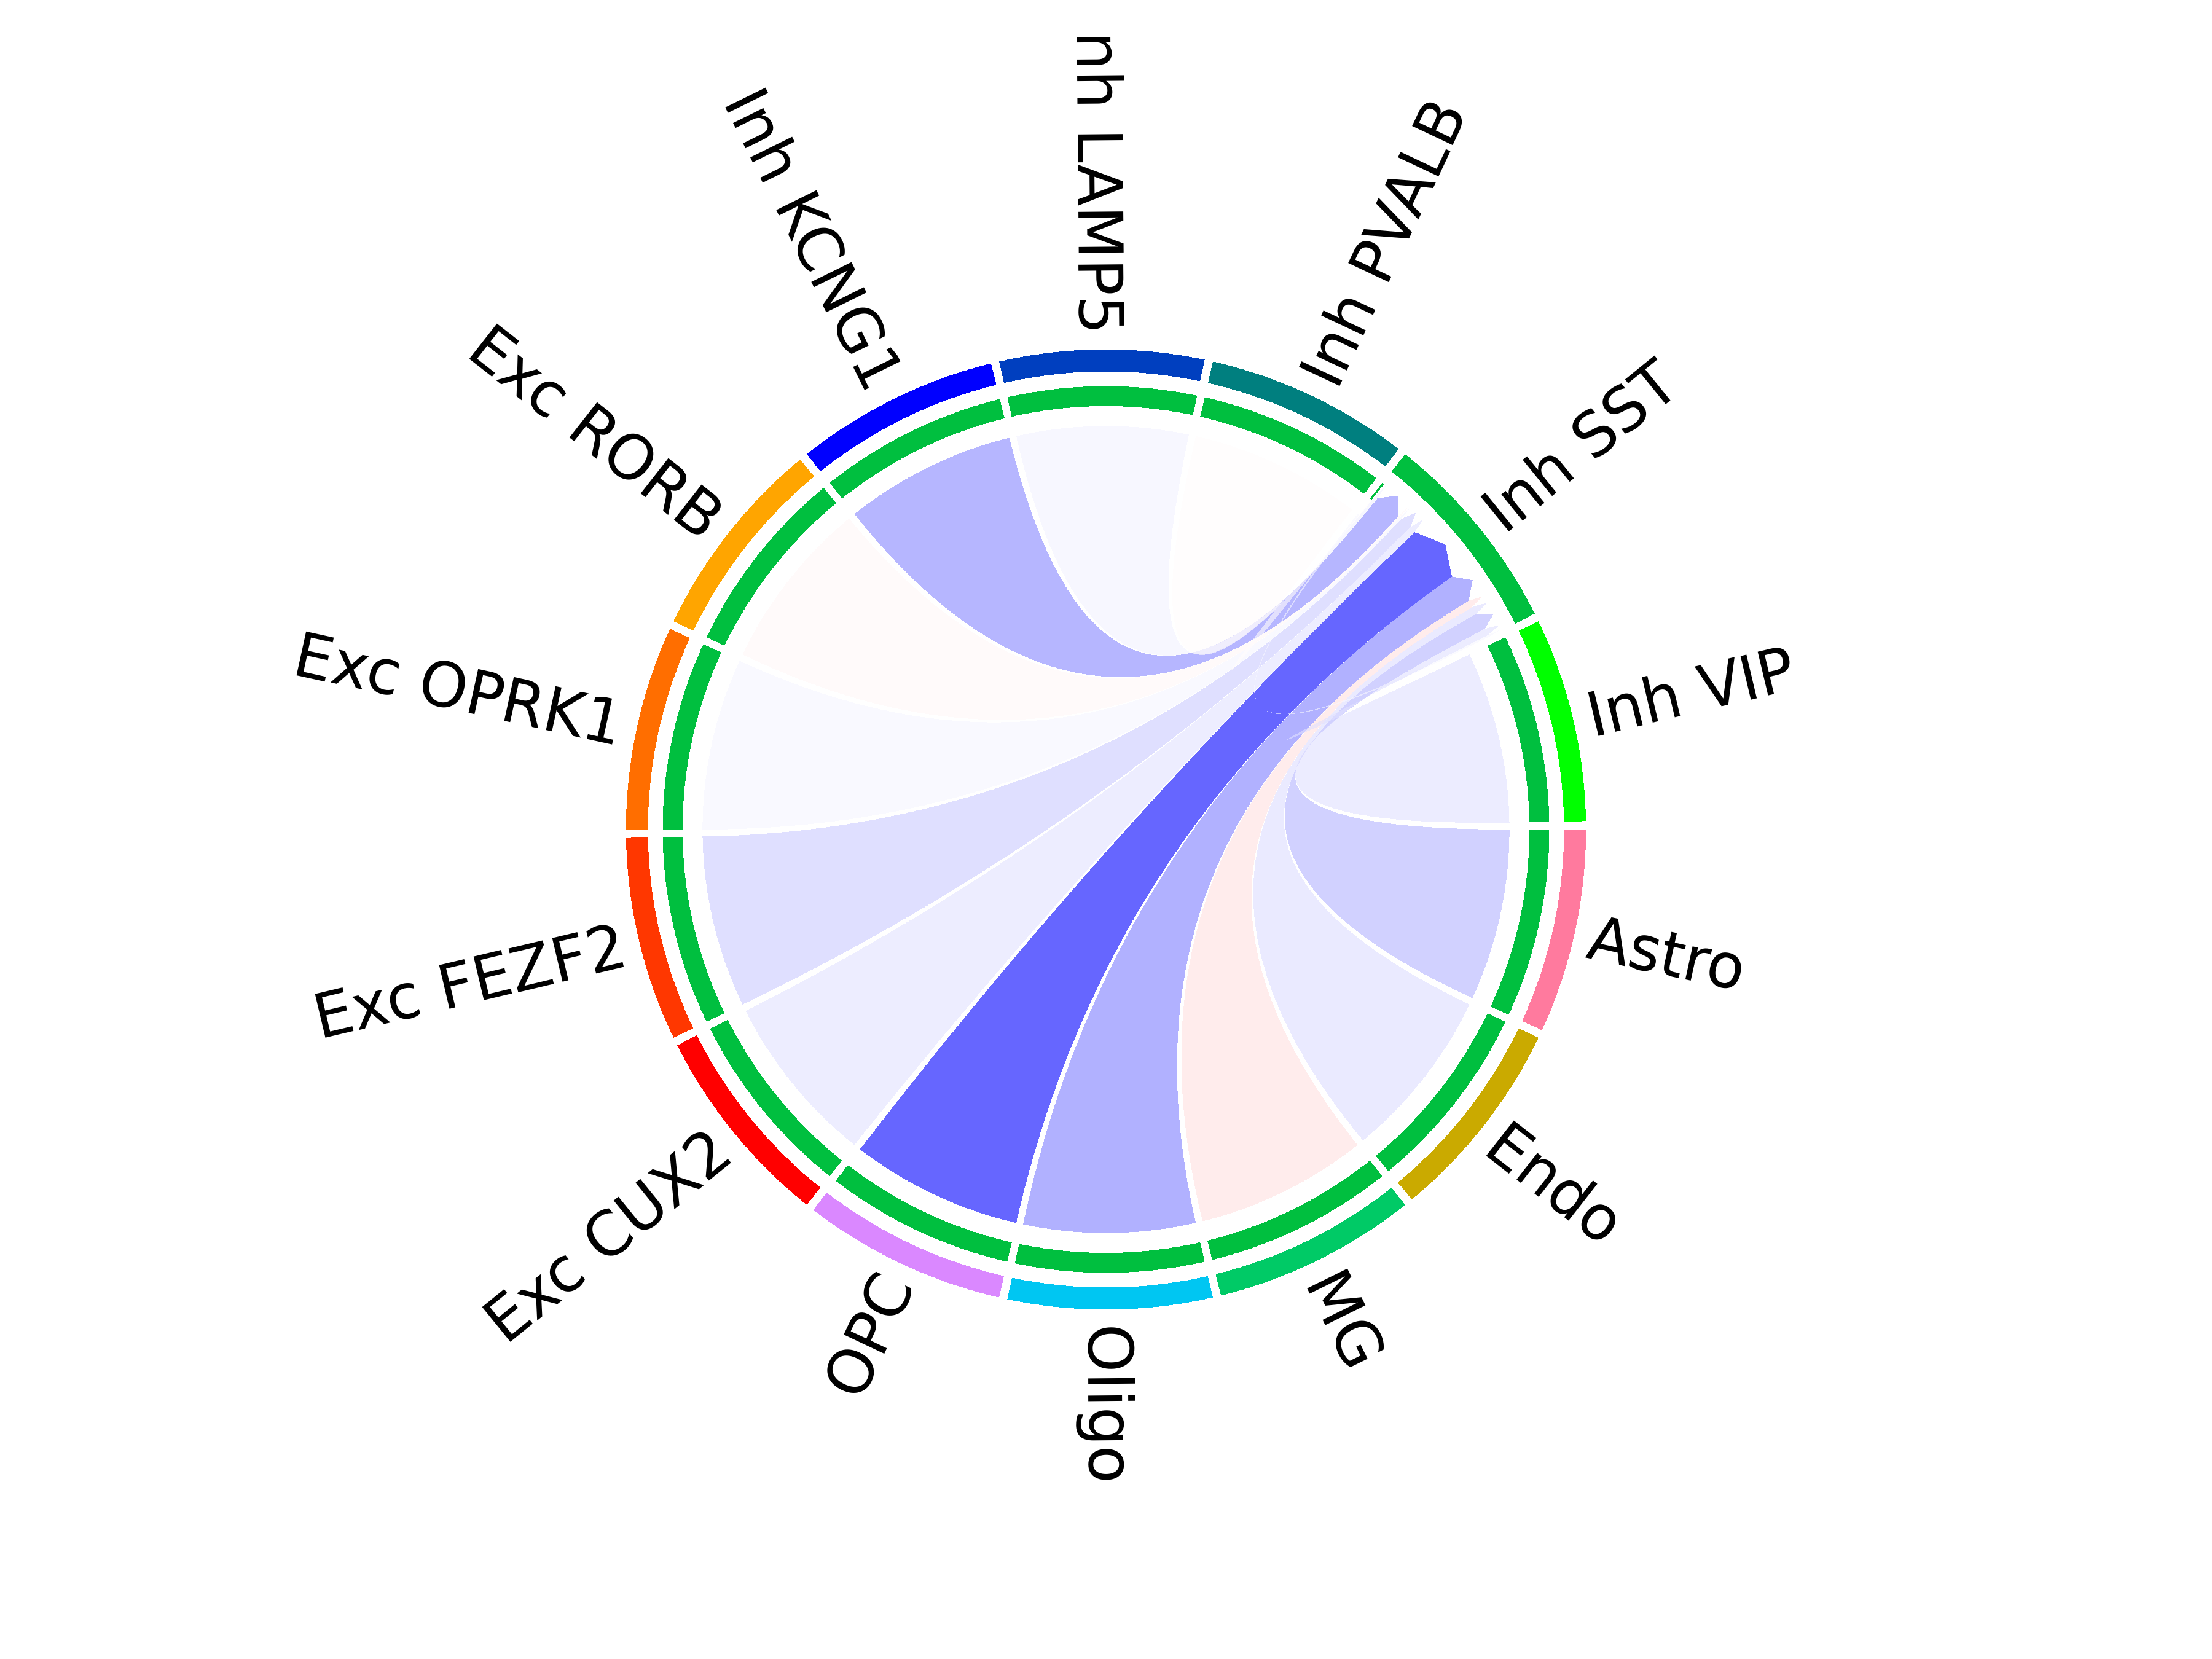

In [54]:
gg2 <- my_netVisual_aggregate2(net.diff_MDDvCON, layout="chord", cell.order=celltype_name, signaling.name = pathways.show, 
                               color.use = color.use, vertex.label.cex = 2)

pdf(file = glue("/gpfs/gibbs/project/girgenti/cl2553/C2C/PTSD_Call/cellchat_figs/chord-{direction}_{sender}{receiver}-{pathways.show}-MDD.pdf"), 
    width = 12, height = 12)
print(gg2) 
dev.off()

## Pathway

In [108]:
# Paramter
pathways.show <- "NRG"

# Don't change. Hard-coded
matrix.CT     <- cellchat.CT@netP$prob        # 14 x 14 x 946
matrix.DIS    <- cellchat.DIS@netP$prob       # 14 x 14 x 943
normalization <- sum(cellchat.CT@net$weight) / sum(cellchat.DIS@net$weight)  # CT / DIS, obtained from the 14x14 cell type matrix

pathways.show_weight.CT  <- matrix.CT[, , pathways.show]
pathways.show_weight.DIS <- matrix.DIS[, , pathways.show]
pathways.show_weight.differential <- pathways.show_weight.DIS * normalization - pathways.show_weight.CT        # DIS - CON

# reorder the celltypes
pathways.show_weight.differential <- pathways.show_weight.differential[celltype_name, celltype_name]

pathways.show_weight.differential[setdiff(celltype_name, sender), setdiff(celltype_name, receiver)] <- 0 

# # if statement needed for 2D-matrices with only 1 ligand-receptor pair
# if ((length(pathways.show) > 1) & (length(sender_celltypes)) > 1 & (length(receiver_celltypes) > 1)) {
#     pathways.show_weight.CT           <- apply(matrix.CT[sender_celltypes, receiver_celltypes, pathways.show], c(3), sum)
#     pathways.show_weight.DIS          <- apply(matrix.DIS[sender_celltypes, receiver_celltypes, pathways.show], c(3), sum)
#     pathways.show_weight.differential <- pathways.show_weight.DIS * normalization - pathways.show_weight.CT        # DIS - CON
# } else if (length(pathways.show) == 1) {
#     pathways.show_weight.CT           <- sum(matrix.CT[sender_celltypes, receiver_celltypes, pathways.show])
#     pathways.show_weight.DIS          <- sum(matrix.DIS[sender_celltypes, receiver_celltypes, pathways.show])
#     pathways.show_weight.differential <- pathways.show_weight.DIS * normalization - pathways.show_weight.CT        # DIS - CON
# } else if ((length(sender_celltypes)) == 1 || (length(receiver_celltypes) == 1)) {
#     pathways.show_weight.CT           <- apply(matrix.CT[sender_celltypes, receiver_celltypes, pathways.show], c(2), sum)
#     pathways.show_weight.DIS          <- apply(matrix.DIS[sender_celltypes, receiver_celltypes, pathways.show], c(2), sum)
#     pathways.show_weight.differential <- pathways.show_weight.DIS * normalization - pathways.show_weight.CT        # DIS - CON
# }

In [109]:
pathways.show_weight.differential

,Astro,Endo,MG,Oligo,OPC,Exc CUX2,Exc FEZF2,Exc OPRK1,Exc RORB,Inh KCNG1,Inh LAMP5,Inh PVALB,Inh SST,Inh VIP
Astro,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Endo,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
MG,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Oligo,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
OPC,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Exc CUX2,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Exc FEZF2,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Exc OPRK1,0.05365495,-0.01015196,0,0.06532236,0.06482741,0,-0.01835729,0,0,0.07033474,0.06988741,0.07041294,0.0181318,0.07274124
Exc RORB,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000
Inh KCNG1,0.00000000,0.00000000,0,0.00000000,0.00000000,0,0.00000000,0,0,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000


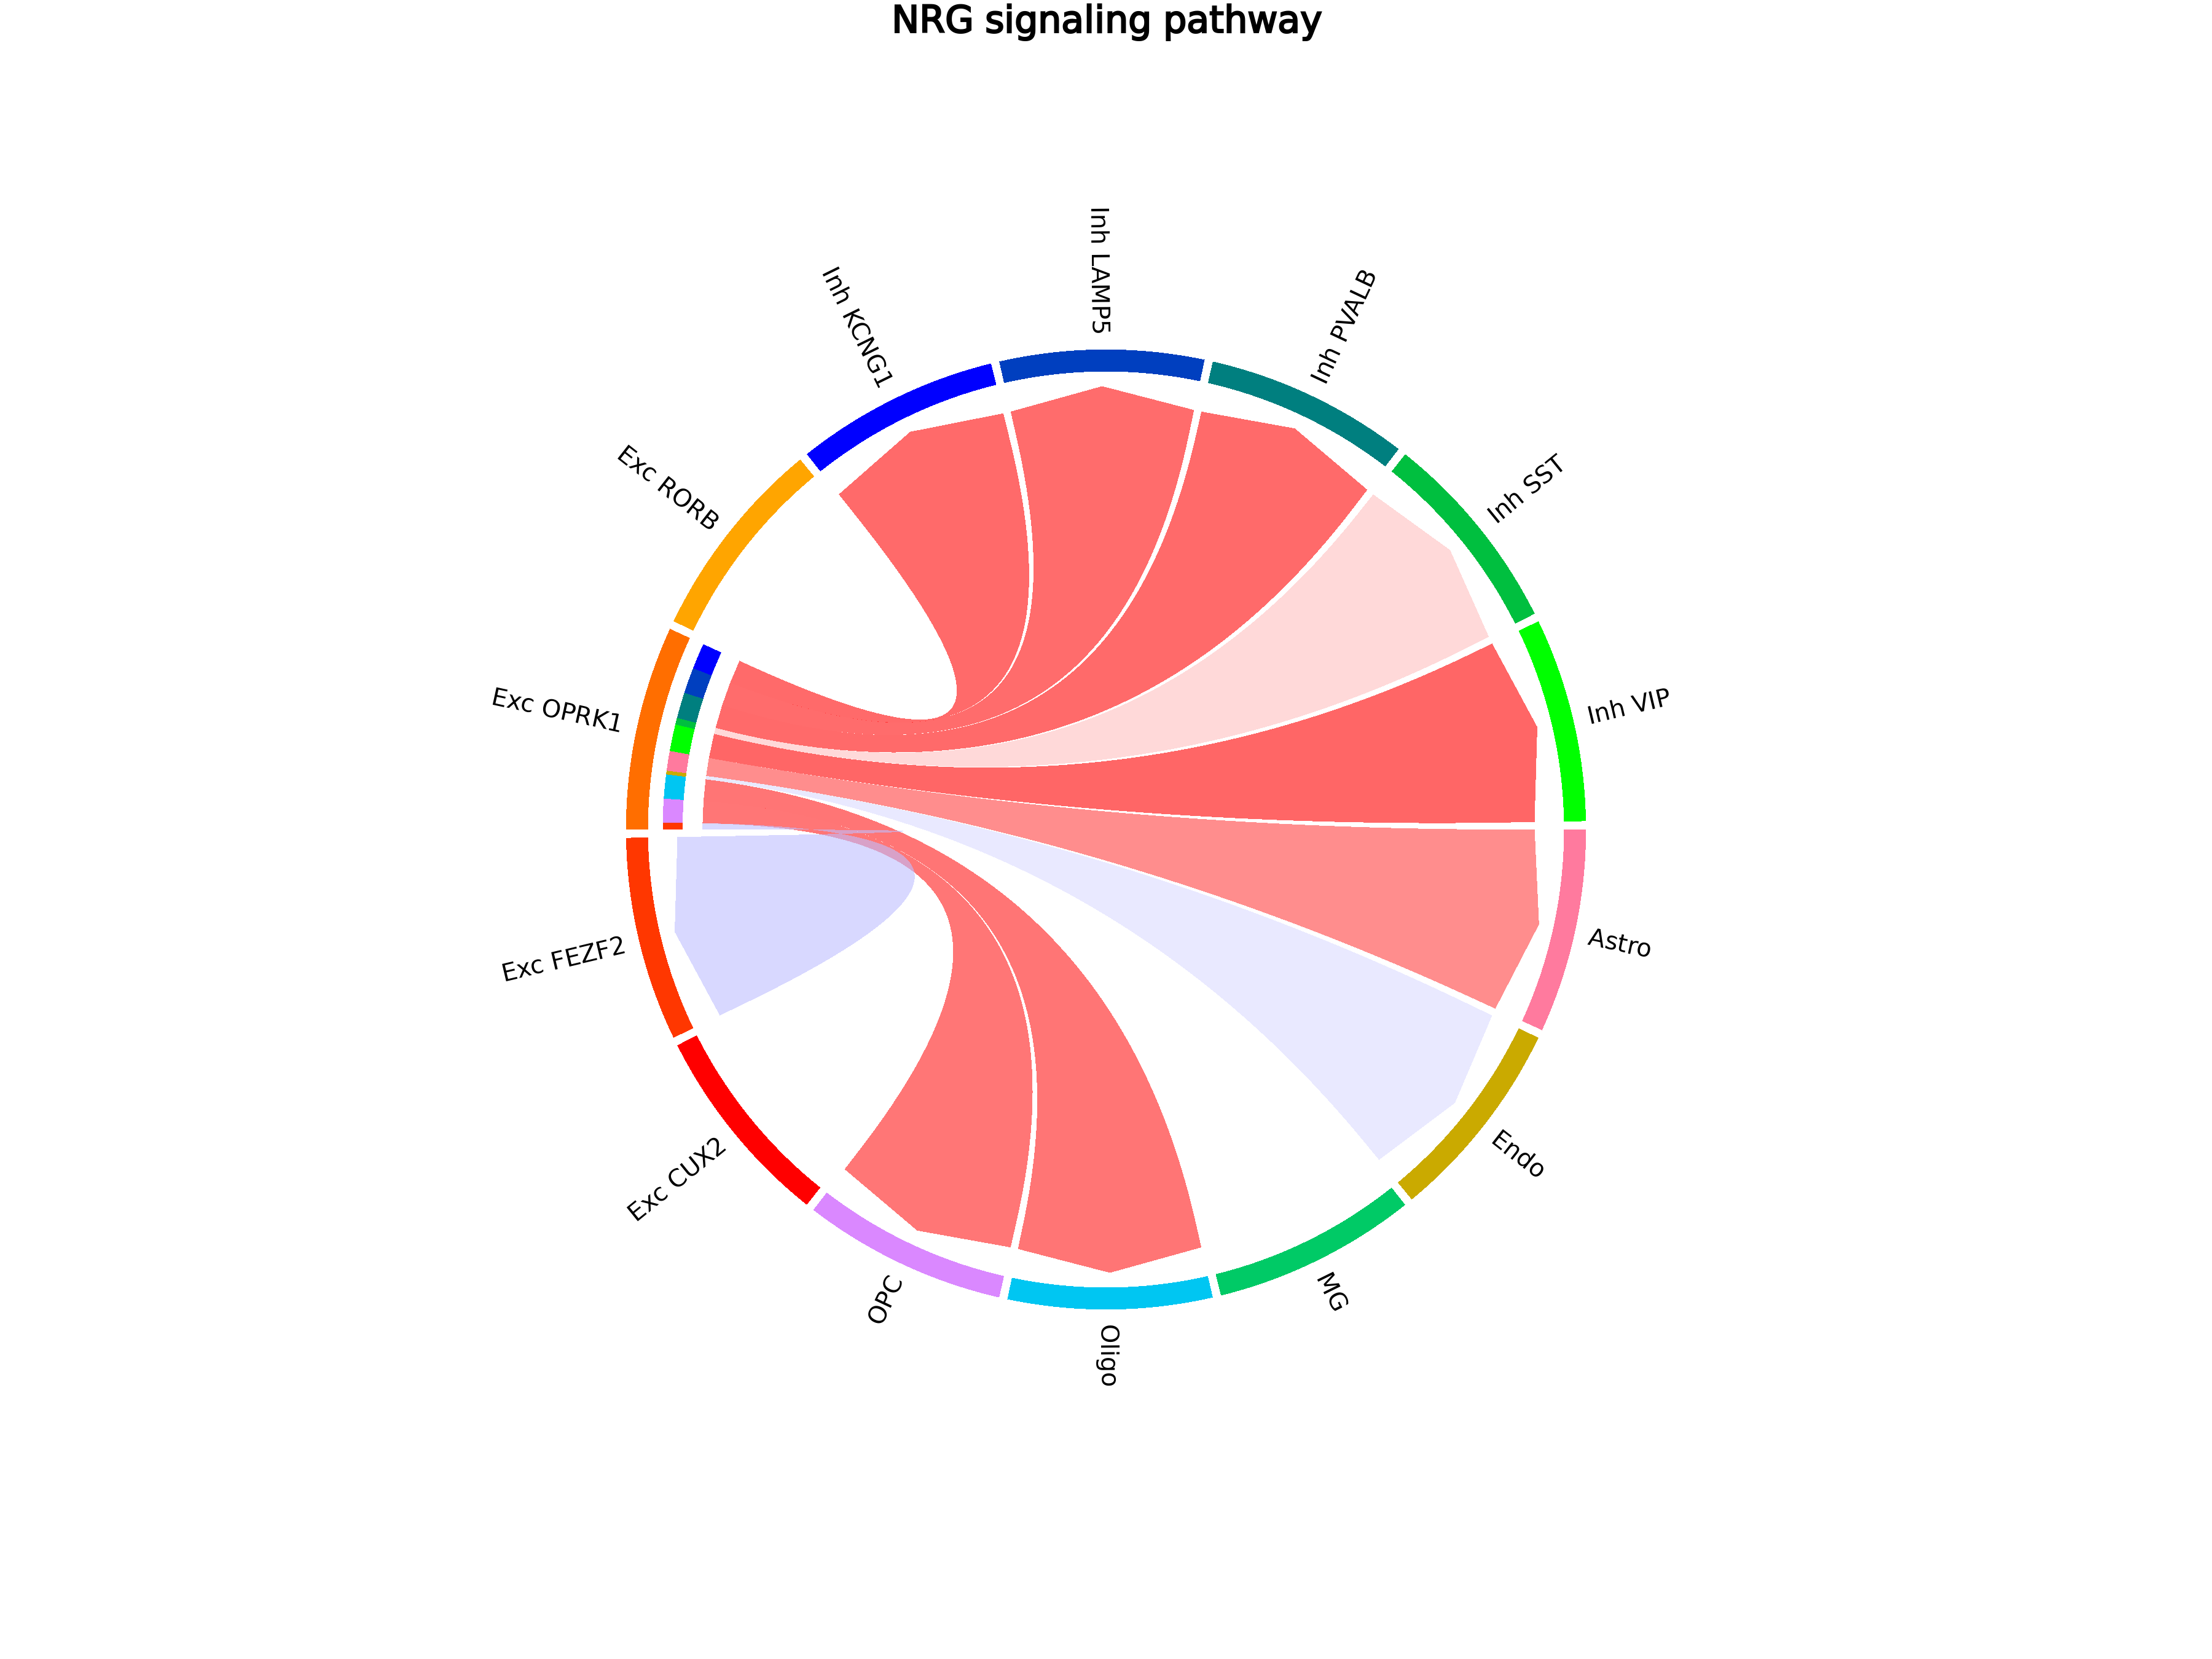

In [110]:
gg2 <- my_netVisual_aggregate2(pathways.show_weight.differential, layout="chord", cell.order=celltype_name, color.use = color.use, 
                               signaling.name = pathways.show)

# Visual

In [120]:
pdf(file = glue("/gpfs/gibbs/project/girgenti/cl2553/C2C/PTSD_Call/cellchat_figs/chord-{direction}_{sender}{receiver}-{pathways.show}-{disease}.pdf"), 
    width = 8, height = 8)
print(gg2) 
dev.off()

png 
  2